# Making a Perfect Movie...

#### Problem Statement:   A large production company by the name of Sun Pictures seeks to produce a flawless film with top-notch scripting and cinematography while still turning a profit. How are you going to approach the issue?

#### Solution: We can go back on the history of films that are regarded as perfect or nearly perfect in order to create one that is flawless in every aspect, including cinematography, plot, emotional effect, and many more. The dataset that follows provides details about the top 1000 films published on the IMDB website, including movie titles, directors, genres, audience and critic ratings, release years, and box office earnings.


In [61]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# Load the  top 1000 films dataset
df = pd.read_csv(r"C:\Users\prach\Downloads\imdb_raw.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1000 non-null   object 
 1   director      1000 non-null   object 
 2   release_year  1000 non-null   object 
 3   runtime       1000 non-null   object 
 4   genre         1000 non-null   object 
 5   rating        1000 non-null   float64
 6   metascore     1000 non-null   int64  
 7   gross         1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


# Data Cleaning

In [63]:
# Changing datatypes and renaming the colmuns
df['release_year']=df['release_year'].str.replace("(","", regex = True).str.replace(")","", regex = True).str.replace("I","", regex = True)
df['release_year']=df['release_year'].astype(str).astype(int)
df['gross'] = df['gross'].str.replace("$","",regex = True).str.replace("M","",regex = True)
df['gross']=df['gross'].astype(str).astype(float)
df['runtime'] = df['runtime'].str.replace("min","")
df['runtime'] = df['runtime'].astype(str).astype(int)
df = df.rename(columns = {'gross':'Gross in Millions','title':'Movie Name','director':'Director','release_year':'Release Year','runtime':'Runtime in Minutes','genre':'Genres','rating':'IMDB Rating','metascore':'Metascore'})


In [64]:
#df-> Combined Genres  
df

,Movie Name,Director,Release Year,Runtime in Minutes,Genres,IMDB Rating,Metascore,Gross in Millions
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,The Godfather,Francis Ford Coppola,1972,175,"Crime, Drama",9.2,100,134.97
2,The Dark Knight,Christopher Nolan,2008,152,"Action, Crime, Drama",9.0,84,534.86
3,Schindler's List,Steven Spielberg,1993,195,"Biography, Drama, History",9.0,95,96.90
4,12 Angry Men,Sidney Lumet,1957,96,"Crime, Drama",9.0,97,4.36
...,...,...,...,...,...,...,...,...
995,A Very Long Engagement,Jean-Pierre Jeunet,2004,133,"Drama, Mystery, Romance",7.6,76,6.17
996,Shine,Scott Hicks,1996,105,"Biography, Drama, Music",7.6,87,35.81
997,Philomena,Stephen Frears,2013,98,"Biography, Comedy, Drama",7.6,77,37.71
998,The Invisible Man,James Whale,1933,71,"Horror, Sci-Fi",7.6,87,0.00


In [65]:
# Spilting Genres into different rows and making a new df2
df['Genres'] = df['Genres'].str.split(', ')
df2 = df.explode('Genres')

# Removing rows with zero Metascore & Gross in Millions
df = df[(df['Metascore'] !=0) & (df['Gross in Millions'] !=0)]
df2 = df2[(df2['Metascore'] !=0) & (df2['Gross in Millions'] !=0)]

In [66]:
# df2-> Genres in different rows
df2

,Movie Name,Director,Release Year,Runtime in Minutes,Genres,IMDB Rating,Metascore,Gross in Millions
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86
...,...,...,...,...,...,...,...,...
996,Shine,Scott Hicks,1996,105,Drama,7.6,87,35.81
996,Shine,Scott Hicks,1996,105,Music,7.6,87,35.81
997,Philomena,Stephen Frears,2013,98,Biography,7.6,77,37.71
997,Philomena,Stephen Frears,2013,98,Comedy,7.6,77,37.71


# Genres

### Genre Distribution:

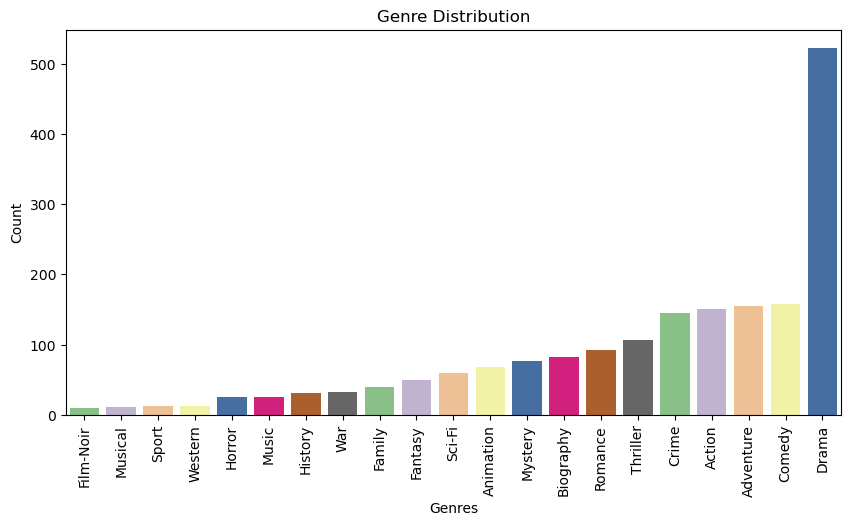

In [67]:
o = df2['Genres'].value_counts(ascending=True)
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Genres', data=df2,palette='Accent',order=o.index,ax=ax)
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

###### >It's intriguing to see how frequently the 'Drama' genre when compared to other genres appears in the top films. This might be because the characters in this genre are so realistic and allow the audience to emotionally connect with them. While film-noir is at the bottom.
###### >The drama genre features stories with high stakes and many conflicts. They're plot-driven and demand that every character and scene move the story forward. Dramas follow a clearly defined narrative plot structure, portraying real-life scenarios or extreme situations with emotionally-driven characters.

In [16]:
# New dataframe for ratings grouped by genres
Ratings=df2.groupby('Genres').mean().sort_values(by='IMDB Rating',ascending =False)[{'IMDB Rating','Metascore','Gross in Millions'}]
Ratings.reset_index(inplace=True)
Ratings['Genres']=Ratings['Genres'].astype(str)

C:\Users\prach\AppData\Local\Temp\ipykernel_9344\1490426585.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Ratings=df2.groupby('Genres').mean().sort_values(by='IMDB Rating',ascending =False)[{'IMDB Rating','Metascore','Gross in Millions'}]
C:\Users\prach\AppData\Local\Temp\ipykernel_9344\1490426585.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Ratings=df2.groupby('Genres').mean().sort_values(by='IMDB Rating',ascending =False)[{'IMDB Rating','Metascore','Gross in Millions'}]


###  Audience and Critic Ratings for a Genre:

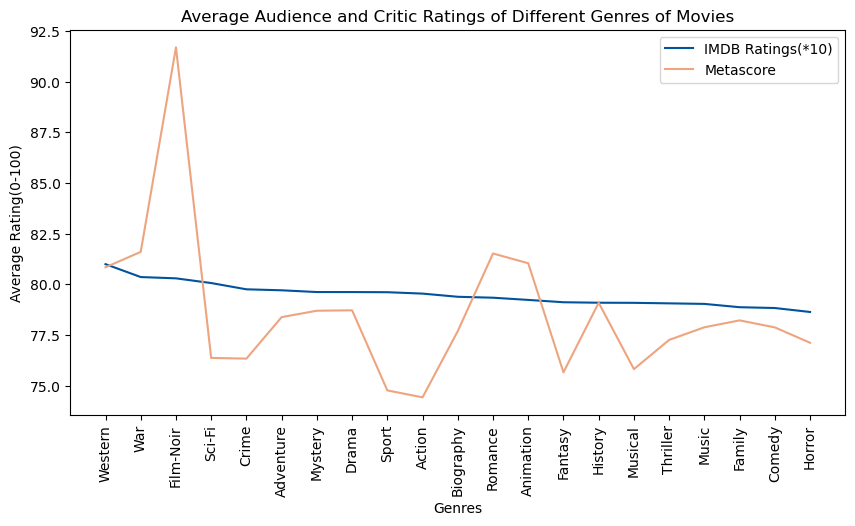

In [15]:
Ratings['IMDB Ratings(*10)'] = (Ratings['IMDB Rating'])*10
Ratings.sort_values(by=['IMDB Ratings(*10)','Metascore'],ascending =False).plot(x='Genres',y=['IMDB Ratings(*10)','Metascore'],color=['#00539C','#EEA47F'],figsize=(10,5))
plt.title('Average Audience and Critic Ratings of Different Genres of Movies')
plt.xlabel('Genres')
plt.ylabel('Average Rating(0-100)')
plt.xticks(range(0,len(Ratings.Genres)), Ratings.Genres, rotation=90)
plt.show() 

######  >Western genres are rated highest by the audience, while Film-Noir is rated highest by critics. Drama, on the other side, is ranked 8th by public and 7th by critics, respectively. While War is at second according to both.
###### >Cynical heroes, dramatic lighting effects, frequent use of flashbacks, complex narratives, and an underlying existentialist worldview are all characteristics of the film noir genre. During the years following World War II, American crime dramas were dominated by this genre.Now-a-days, neo-noir is considered as revival of film noir.
###### >The Western genre is portrayal of the American West as a vast, untamed wilderness where people had to rely on their wits and strength to survive. The genre explores timeless themes such as justice, morality, revenge, and redemption that resonate with audiences of all ages and backgrounds.
###### >War film is a film genre concerned with warfare, typically about naval, air, or land battles, with combat scenes central to the drama. It has been strongly associated with the 20th century.


### Box Office Collection of a Genre:

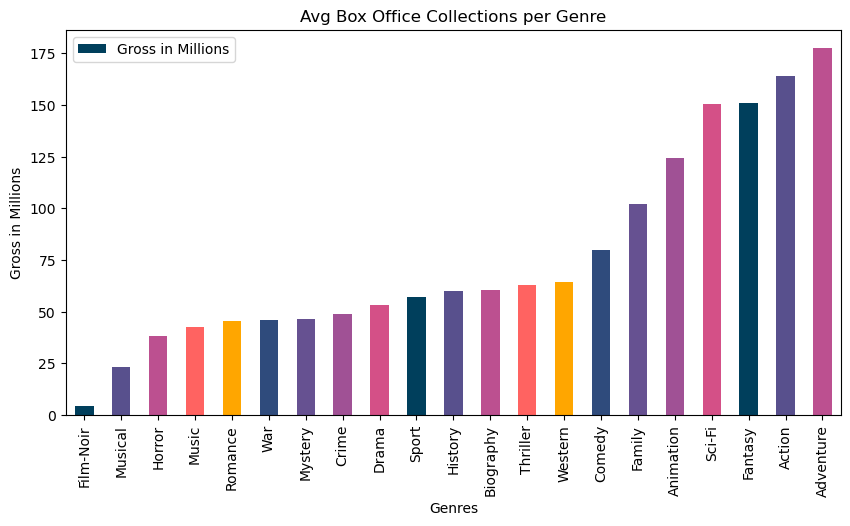

In [19]:
Ratings.sort_values(by='Gross in Millions').plot(kind='bar',x='Genres',y='Gross in Millions',color=['#003f5c','#58508d', '#bc5090','#ff6361','#ffa600','#2f4b7c','#665191','#a05195','#d45087'],figsize=(10,5))
plt.title('Avg Box Office Collections per Genre')
plt.xlabel('Genres')    
plt.ylabel('Gross in Millions')
plt.show()

##### > The most profitable films at the box office are action and adventure films. This could be as a result of great cinematic escapism, high marketability and simple storytelling.  
##### > While film-noir is at bottom while western & drama genres are at 8th and 12th spot respectively.


### The top alternatives for a perfect movie would be films in the Film-Noir, War, and Western genres.

# Movie Duration

### Distribution of Movie Duration:

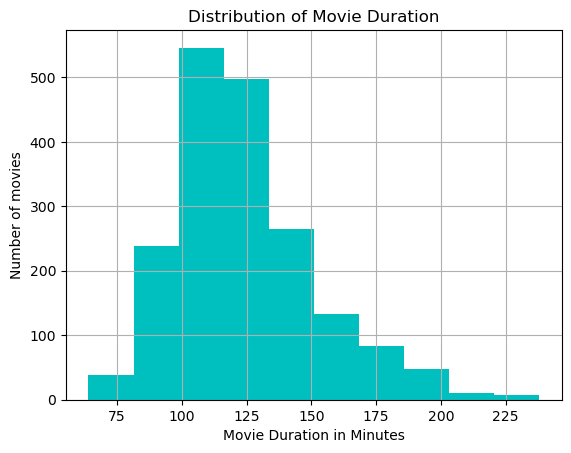

In [27]:
plt.hist('Runtime in Minutes',data = df2, bins = 10, color='c')
plt.xlabel('Movie Duration in Minutes')
plt.ylabel('Number of movies')
plt.title('Distribution of Movie Duration')
plt.grid(True)
plt.show()

##### >  The majority of these top 1000 films have a length of roughly 120 minutes.

### Average Movie Duration Over the Years from 1920 to 2022:

<Axes: title={'center': 'Average Movie Duration Over the Years ->1920 - 2023'}, xlabel='Year', ylabel='Average Duration'>

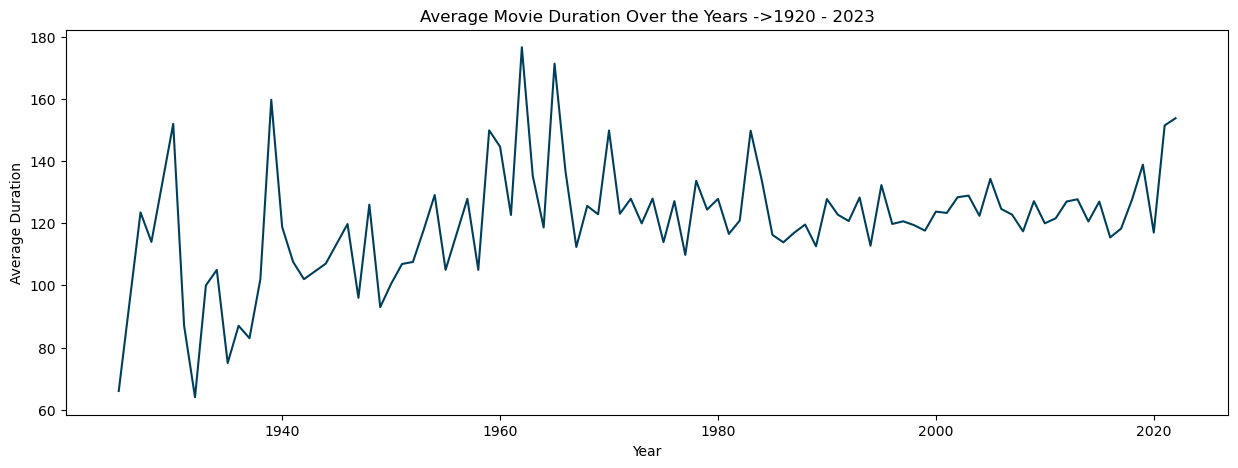

In [30]:
df2.groupby('Release Year')['Runtime in Minutes'].mean().plot(kind = 'line', xlabel = 'Year', ylabel = 'Average Duration', title = 'Average Movie Duration Over the Years ->1920 - 2023',figsize=(15,5),color='#003f5c')

##### >Films from the early 1900s appear to have had shorter runs on average than recent ones. With the exception of 1965, when it reached 167 minutes, films have generally had an average runtime of 120 to 140 minutes since the 1960s.
##### > However, the average time has increased to 140 minutes over the last two years (21–22).

### So the suggested running time of the film is therefore 130 minutes.

# Box Office Collection

### Box Office Collection against Audience & Critic Ratings:

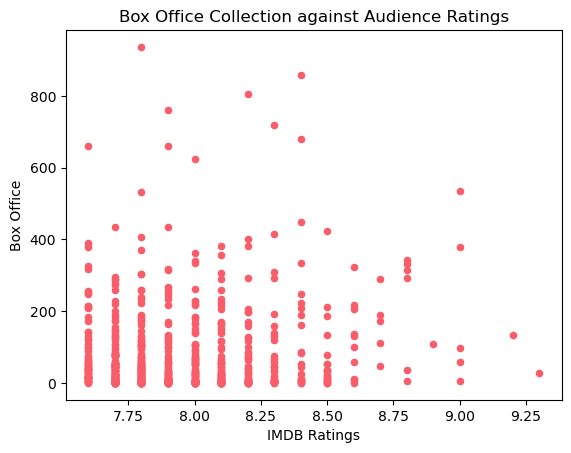

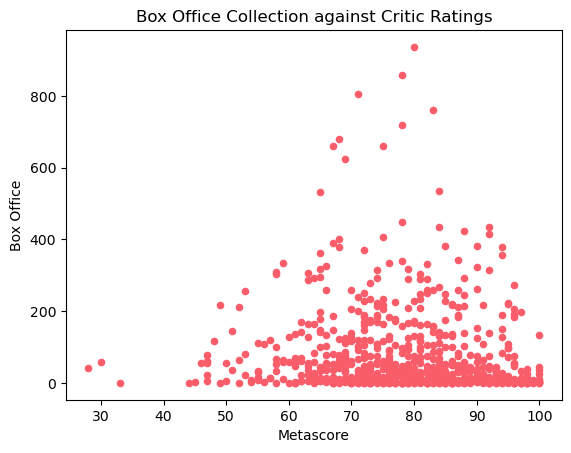

In [31]:
#imdb rating against gross
df.plot.scatter(x = 'IMDB Rating', y = 'Gross in Millions', color = '#f95d6a',xlabel='IMDB Ratings',ylabel='Box Office')
plt.title('Box Office Collection against Audience Ratings')
plt.show()

#metascore against gross
df.plot.scatter(x = 'Metascore', y = 'Gross in Millions', color = '#f95d6a',xlabel='Metascore',ylabel='Box Office')
plt.title('Box Office Collection against Critic Ratings')
plt.show()


##### >It appears that there is no clear relationship between a movie's box office success and its audience reception. Films with an average score of around 80 seem to perform better monetarily, at least according to the critic reviews.

# Director

##### We'll need directors who are still working in show business because we'll be filming in the next years. We will now focus on directors who continued to shoot films even after 1990.

In [60]:
# making a new dataframe with release yr greater than 1990
c=df.groupby('Director').count()['Movie Name']
yr = df[(df['Release Year'] > 1990)].groupby('Director').mean()[{'IMDB Rating','Metascore','Gross in Millions','Release Year'}].sort_values(by='Metascore',ascending=False)
df4=yr.join(c,on='Director',how='outer').rename(columns = {'Movie Name':'No. of Movies in top 1000'}).sort_values(by='Metascore',ascending=False)
df4.reset_index(inplace=True)
df4.head(20)

C:\Users\prach\AppData\Local\Temp\ipykernel_9344\136139017.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yr = df[(df['Release Year'] > 1990)].groupby('Director').mean()[{'IMDB Rating','Metascore','Gross in Millions','Release Year'}].sort_values(by='Metascore',ascending=False)
C:\Users\prach\AppData\Local\Temp\ipykernel_9344\136139017.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  yr = df[(df['Release Year'] > 1990)].groupby('Director').mean()[{'IMDB Rating','Metascore','Gross in Millions','Release Year'}].sort_values(by='Metascore',ascending=False)


,index,Director,Release Year,IMDB Rating,Metascore,Gross in Millions,No. of Movies in top 1000
0,Guillermo del Toro,Guillermo del Toro,2006.000000,8.200000,98.000000,37.630000,1
1,Cristian Mungiu,Cristian Mungiu,2007.000000,7.900000,97.000000,1.190000,1
2,Kenneth Lonergan,Kenneth Lonergan,2016.000000,7.800000,96.000000,47.700000,1
3,Steve McQueen,Steve McQueen,2013.000000,8.100000,96.000000,56.670000,1
4,Gary Trousdale,Gary Trousdale,1991.000000,8.000000,95.000000,218.970000,1
5,Céline Sciamma,Céline Sciamma,2019.000000,8.100000,95.000000,3.760000,1
6,Edward Yang,Edward Yang,2000.000000,8.100000,94.000000,1.140000,1
7,Luca Guadagnino,Luca Guadagnino,2017.000000,7.800000,94.000000,18.100000,1
8,Noah Baumbach,Noah Baumbach,2019.000000,7.900000,94.000000,2.000000,1
9,Tom McCarthy,Tom McCarthy,2015.000000,8.100000,93.000000,45.060000,1


##### > Movies that receive an average critics' score of approximately 80 tend to perform better at the box office, as indicated by the previous deduction. Therefore, we will only compare critic reviews when choosing a director.

### Avg Ratings of a Director's Movies:

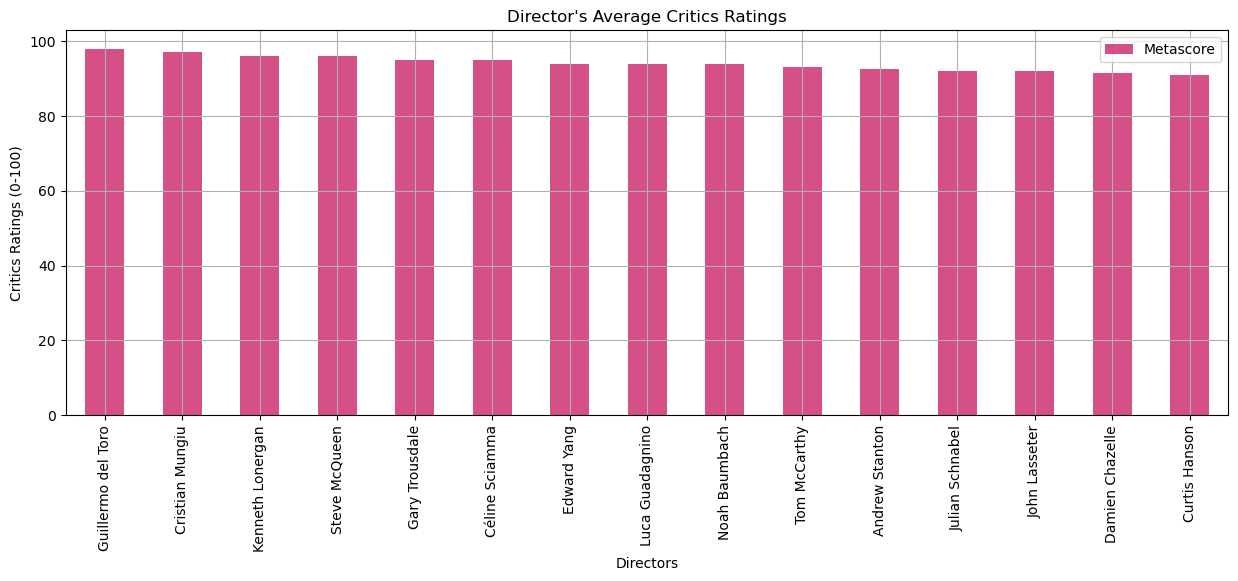

In [58]:
df4.head(15).plot(kind='bar',x='Director',y=['Metascore'],xlabel='Directors',ylabel='Critics Ratings (0-100)',color=['#d45087'],title="Director's Average Critics Ratings",figsize=(15,5))
plt.xticks(rotation=90)
plt.grid()

#####  >Guillermo del Toro, Cristian Mungiu and Kenneth Lonergan	 are the top 3 directors.

### No. Of Movies in top 1000 of Directors:

<Axes: title={'center': 'No. Of Movies in top 1000 of Directors'}, xlabel='Directors', ylabel='No. of Movies in top 1000'>

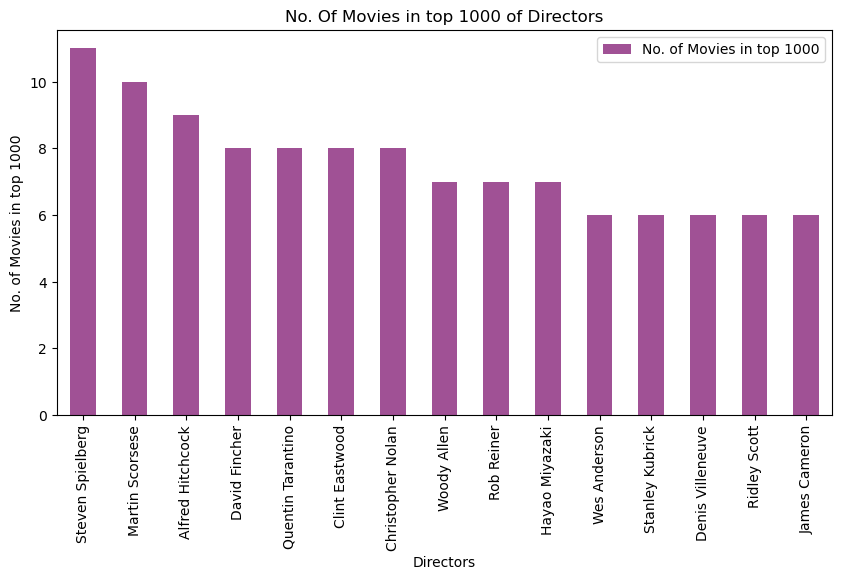

In [47]:
df4.sort_values(by='No. of Movies in top 1000',ascending=False).head(15).plot(kind='bar',x='Director',y=['No. of Movies in top 1000'],xlabel='Directors',ylabel='No. of Movies in top 1000',title="No. Of Movies in top 1000 of Directors",color=['#a05195'],figsize=(10,5))

#####  >Steven Spielberg & Martin Scorsese have the highest number of movies in top 1000 films 

### Director's Average Box Office Collection:

<Axes: title={'center': "Director's Average Box Office Collection"}, xlabel='Directors', ylabel='Avg Gross in Millions'>

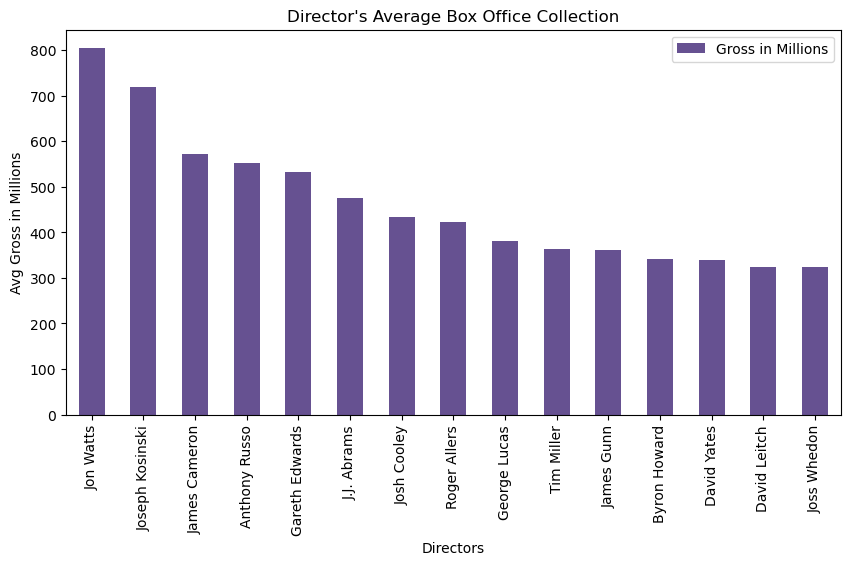

In [48]:
df4.sort_values(by='Gross in Millions',ascending=False).head(15).plot(kind='bar',color='#665191',x='Director',y=['Gross in Millions'],xlabel='Directors',ylabel='Avg Gross in Millions',title="Director's Average Box Office Collection",figsize=(10,5))


##### >Jon Watts & Joseph Kosinski have highest box office collection though they both have only one movie in top 1000.

### > Our primary objective is to create the ideal film, so gaining the highest possible ratings should be our main priority. Therefore, Cristian Mungiu or Guillermo del Toro might be good choices. However, Martin Scorsese and Steven Spielberg have numerous films that rank in the top 1000, making them unquestionably more successful. 

# Conclusion

#### Sun Pictures' aim to create the ideal film can only be realised if we make the best decisions possible in order to receive the highest possible ratings from both audiences and reviewers.The main genre, running time, and director of a film are all elements that contribute to its perfection.After analysing the database of the top 1000 rated films, we concluded that Film-Noir, War, or Western genres would be the most acceptable choices.Considering that Steven Spielberg has 11 films that rank in the top 1000 and have positive reviews, he would be the best pick for director, in my opinion.The movie should last about 130 minutes, according by the current pattern.It appeared, at least based on the reviews from critics, that films with an average score of approximately 80 did better financially.

